### Moises Quiroz Diaz
G3

### Desafío - Análisis lineal discriminante

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.


#### Descripción
Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
* default : Variable Binaria. Registra si el cliente entró en morosidad o no.
* income : Ingreso promedio declarado por el cliente.
* balance : total del sando en la cuenta de crédito.
* student : Variable binaria. Registra si el cliente es estudiante o no.

### Ejercicio 1: Preparación de ambiente de trabajo
* Importe los módulos básicos para el análisis de datos.
* Importe las clases LabelEncoder , StandardScaler y LabelBinarizer de preprocessing
* Importe las funciones train_test_split y cross_val_score de model_selection
* Importe la función classification_report de metrics
* Importe las clases LinearDiscriminantAnalysis y QuadraticDiscriminantAnalysis .
* Agregue la base de datos en el ambiente de trabajo.
* Inspeccione la distribución de cada atributo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler, LabelBinarizer

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score

In [4]:
from sklearn.metrics import classification_report

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

In [6]:
df = pd.read_csv('default_credit.csv',index_col = 'index')
df.head()

,default,student,balance,income
index,,,,
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


Primero se hace un analisis de la cantidad de las variables categoricas

In [7]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [8]:
df.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

Se procede a generar una serie de graficos para ver como es que se comportan las variables

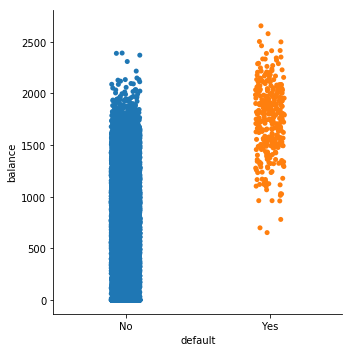

In [9]:
sns.catplot(x="default", y="balance", data=df);

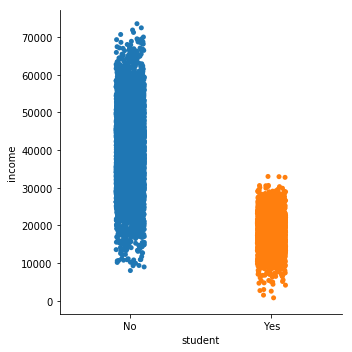

In [10]:
sns.catplot(x="student", y="income", data=df);

Aqui se puede ver que las personas no estudiantes ganan mas dinero promedio

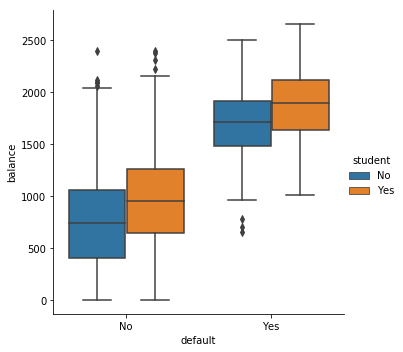

In [11]:
sns.catplot(x="default", y="balance", hue="student", kind="box", data=df);

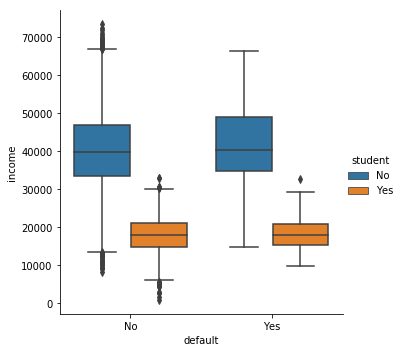

In [12]:
sns.catplot(x="default", y="income", hue="student", kind="box", data=df);

default
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: balance, dtype: object

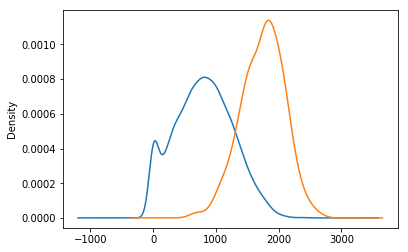

In [13]:
df.groupby('default').balance.plot(kind='kde')

### Ejercicio 2: Modelo base
* Recuerde que los modelos de sklearn no soportan datos que no sean numéricos. Transforme los atributos pertinentes con LabelEncoder .
* Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
* Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiperparámetros.
* Genere métricas de evaluación utilizando classification_report .
* Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

In [14]:
df['default'] = LabelEncoder().fit_transform(df['default'])

In [15]:
df.default.value_counts() # 'No' corresponde al valor 0

0    9667
1     333
Name: default, dtype: int64

In [16]:
df['student'] = LabelEncoder().fit_transform(df['student'])
df.student.value_counts()

0    7056
1    2944
Name: student, dtype: int64

In [17]:
df.head()

,default,student,balance,income
index,,,,
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


In [18]:
df.columns[1:]

Index(['student', 'balance', 'income'], dtype='object')

In [19]:
X_train, X_test, y_train,y_test = train_test_split(df[df.columns[1:]],df['default'],test_size=.33,random_state=11238)
                                                      

In [20]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [21]:
lda_class_pred = lda_model.predict(X_test)

In [22]:
print(classification_report(y_test,lda_class_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3186
           1       0.72      0.25      0.38       114

    accuracy                           0.97      3300
   macro avg       0.85      0.63      0.68      3300
weighted avg       0.97      0.97      0.96      3300



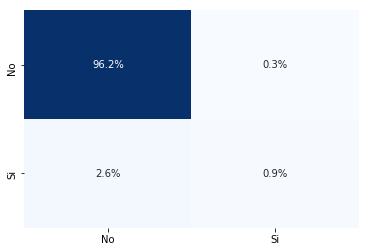

In [23]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test,lda_class_pred)/len(y_test)
target_label = ['No','Si']
sns.heatmap(cnf,annot=True,fmt='.1%',cbar=False,cmap='Blues',
    xticklabels=target_label,yticklabels=target_label)

Con las metricas observadas se puede notar que el modelo tienen un accuracy bastante alto, pero esto debido a que la data se encuentra tan poblada de valores 'No' que al etiquetar a las mayorias de las predicciones con esta etiqueta en la mayoria de los casos le acierta, asi que si bien es un accuracy alto, se piensa que no es un buen modelo de generalizacion

### Ejercicio 3: Refactorización 1 - información a priori
* Dado que trabajamos con modelos generativos, podemos incluír información exógena. Para este caso agregaremos dos distribuciones:
    * Asumamos que hay un 50/50 de morosos y no morosos.
    * Asumamos que hay un 60/40 de morosos y no morosos.
* Por cada modelo, reporte las métricas de clasificación.

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3186
           1       0.17      0.92      0.29       114

    accuracy                           0.84      3300
   macro avg       0.58      0.88      0.60      3300
weighted avg       0.97      0.84      0.89      3300



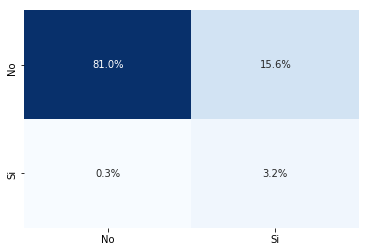

In [26]:
lda_model = LinearDiscriminantAnalysis(priors=[0.5, 0.5])
lda_model.fit(X_train,y_train)
lda_class_pred = lda_model.predict(X_test)
print(classification_report(y_test,lda_class_pred))
cnf = confusion_matrix(y_test,lda_class_pred)/len(y_test)
target_label = ['No','Si']
sns.heatmap(cnf,annot=True,fmt='.1%',cbar=False,cmap='Blues',
    xticklabels=target_label,yticklabels=target_label)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3186
           1       0.14      0.96      0.24       114

    accuracy                           0.79      3300
   macro avg       0.57      0.87      0.56      3300
weighted avg       0.97      0.79      0.86      3300



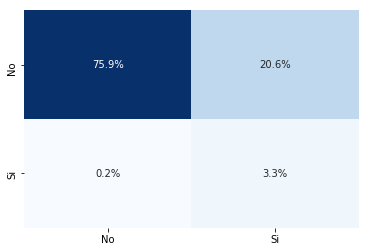

In [28]:
lda_model = LinearDiscriminantAnalysis(priors=[0.4, 0.6])
lda_model.fit(X_train,y_train)
lda_class_pred = lda_model.predict(X_test)
print(classification_report(y_test,lda_class_pred))
cnf = confusion_matrix(y_test,lda_class_pred)/len(y_test)
target_label = ['No','Si']
sns.heatmap(cnf,annot=True,fmt='.1%',cbar=False,cmap='Blues',
    xticklabels=target_label,yticklabels=target_label)

### Ejercicio 4: Refactorización 2 - oversampling
Digresión: Synthetic Over(Under)Sampling

* Por lo general podemos intentar aliviar el problema del desbalance de clases mediante la ponderación dentro del algoritmo. Otra alternativa es el muestreo con reemplazo dentro de los conjuntos de entrenamiento. Estos métodos clásicos se conocen como Oversampling cuando repetimos registros aleatorios de la clase minoritaria, y Undersampling cuando eliminamos aleatoriamente registros de la clase mayoritaria.
* Un contratiempo de estos métodos clásicos es que pueden replicar información sesgada que afecte el desempeño de generalización del modelo. Si los datos son malos, estaremos replicando estas fallas.
* Otra solución es generar ejemplos de entrenamiento sintéticos mediante el entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la solución funciona de la siguiente forma: 
    * En función a un subconjunto de datos correspondientes a la case minoritaria, entrenamos algún modelo no supervisado o generativo como Naive Bayes, KMeans o KNearestNeighbors para generar representaciones sintéticas de los datos en el espacio de atributos de la clase específica mediante 
    
    $\mathbf{x}_{nuevoEjemplo} = \mathbf{x}_{i} + \lambda (\mathbf{x}_{zi} - \mathbf{x}_{i})$ 
    
    donde 
    $\mathbf{x}_{zi}$ 
    es un ejemplo de entrenamiento de la clase minoritaria y $\lambda$ es un parámetro de interpolación aleatorio $\lambda \sim \textsf{Uniforme}(0, 1)$.
    
    
* Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre clases. Ahora generaremos observaciones sintéticas mediante SMOTE (Synthetic Minority Oversampling Technique). Para ello, debemos agregar el paquete a nuestro ambiente virtual. En nuestro terminal agregamos conda install -c conda-forge imbalanced-learn. Incorpore SMOTE en el ambiente de trabajo con la siguiente sintáxis from imblearn.over_sampling import SMOTE.

* Para implementar oversampling, debemos generar nuevos objetos que representan nuestra muestra de entrenamiento incrementada artificialmente. Para ello implemente la siguiente sintáxis:

```python
from imblearn.over_sampling import SMOTE
# Instanciamos la clase
oversampler = SMOTE(random_state=11238, ratio='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)
```

* Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su desempeño.

Using TensorFlow backend.


              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3186
           1       0.17      0.92      0.29       114

    accuracy                           0.84      3300
   macro avg       0.58      0.88      0.60      3300
weighted avg       0.97      0.84      0.89      3300



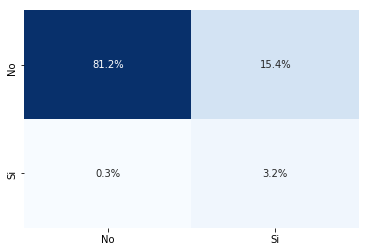

In [30]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=11238, ratio='minority')

X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)


lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_oversamp,y_train_oversamp)
lda_class_pred = lda_model.predict(X_test)
print(classification_report(y_test,lda_class_pred))
cnf = confusion_matrix(y_test,lda_class_pred)/len(y_test)
target_label = ['No','Si']
sns.heatmap(cnf,annot=True,fmt='.1%',cbar=False,cmap='Blues',
    xticklabels=target_label,yticklabels=target_label)

### Ejercicio 5: Refactorización 3 - QDA

* Por último, implemente un modelo QuadraticDiscriminantAnalysis con los datos aumentados artificialmente. Genere las métricas de desempeño.
* Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3186
           1       0.17      0.92      0.29       114

    accuracy                           0.84      3300
   macro avg       0.58      0.88      0.60      3300
weighted avg       0.97      0.84      0.89      3300



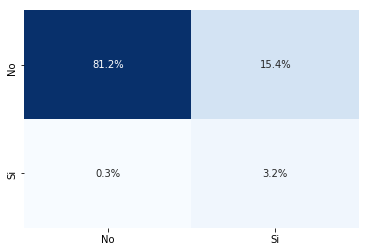

In [32]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_oversamp,y_train_oversamp)
qda_class_pred = lda_model.predict(X_test)
print(classification_report(y_test,qda_class_pred))
cnf = confusion_matrix(y_test,qda_class_pred)/len(y_test)
target_label = ['No','Si']
sns.heatmap(cnf,annot=True,fmt='.1%',cbar=False,cmap='Blues',
    xticklabels=target_label,yticklabels=target_label)

En perspectiva el accuracy de los modelos al refactorizarlos disminuyo, pero esto se puede interpretar con que ahora posee una mejor cualidad de generalizar datos, pero bajo el enunciado del "mejor modelo para predecir" ese seria el 1 ya que tiene un mejor rendimiento. Pero se interpreta como que los mejores modelos para implementear en casos generales son los con data aumentada.